# Tuning Neural Network

In this notebook I tune my Neural Network on the traning/test set.

I focus on the learning rate and number of neurons in the single hidden layer.

I aim at reaching as high accuracy as possible with as low variance as possible. This is ensured by obtaining a similar accuracy for the test and traning set. 

First, import relevant modules

<a name='1'></a>
## 1 - Packages

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from NeuralNetwork import NNW
from HelpFunctions import *
from DecayRates import * 

<a name='1'></a>
## 2 - Data
The data is simulated using sklearn.datasets.make_moons. It consists of 3000 samples to avoid heavy computations. The data is split into test/traning parts consisting of 20%/80% of the data. 

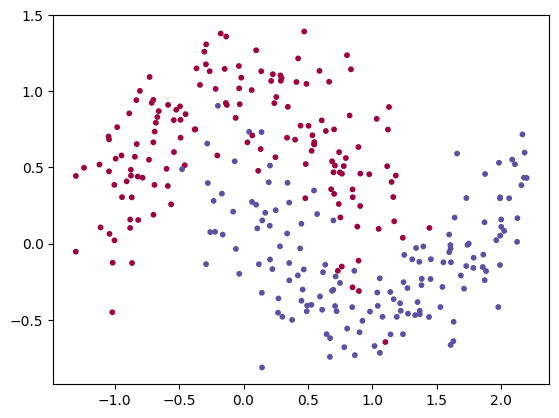

In [2]:
# Load data
X, Y = load_dataset()
# Convert into pandas frames
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
# Split data into training and test set (20% test with 600 obs)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X.T, Y.T, test_size = 0.2, random_state=1)

<a name='1'></a>
## 3 - Fit Network

In [3]:
# Define network architechture
# As the data is not too complex a shallow network should suffice.
layers_dims = [X.shape[0], 4, 1]
# Define network object
Network = NNW()

In [4]:
# Convert data back to arrays for function to work
X_Train = X_Train.T.to_numpy()
X_Test = X_Test.T.to_numpy()
Y_Train = Y_Train.T.to_numpy()
Y_Test = Y_Test.T.to_numpy()

<a name='1'></a>
### 3.1 - Learning rate
The network is based on a gradient descent optimization algorithm. Thus, the weights and biases gets updated using forward/backward propagation as follows
$\theta^{[l]} = \theta^{[l]} - \alpha · \frac{\partial \mathcal{J}}{\partial \theta^{[l]}}$.
$\alpha$ denotes the learning rate and denotes how much the gradient affects the weights at each iteration. A higher value makes the updating steps larger. A larger value makes the algorithm converge faster but a too large value makes it more difficult for the learning algorithm to converge to a fixed point. 

In [5]:
# Tune learning rate
# Search from alpha=0.0001 to 1
np.random.seed(3)
# Define sequence of learning rates to consider (random)
learning_rates = []
predictions_Train = []
predictions_Test = []
i = 1

for r in range(50):
    r = -4 * np.random.rand()
    learning_rates.append(10**r)

learning_rates.sort()
# Fit network over range of learning rates
for learning_rate in learning_rates:
       
    parameters, cost, learningrate = Network.Fit(X = X_Train, 
                                                 Y = Y_Train, 
                                                 layers_dims = layers_dims, 
                                                 optimizer = "gd",
                                                 learning_rate = learning_rate,
                                                 print_cost = False)
    
    predictions_Tr = Network.predict(parameters, X_Train)
    predictions_Te = Network.predict(parameters, X_Test)
    
    predictions_Train.append( float((np.dot(Y_Train, predictions_Tr.T) + np.dot(1 - Y_Train, 1 - predictions_Tr.T)) / float(Y_Train.size)) )
    predictions_Test.append( float((np.dot(Y_Test, predictions_Te.T) + np.dot(1 - Y_Test, 1 - predictions_Te.T)) / float(Y_Test.size)) )
    
    if( i % 10 == 0):
        print('iteration: ' + str(i))
    i += 1

iteration: 10
iteration: 20
iteration: 30
iteration: 40
iteration: 50


Text(0.2, 0.9, '')

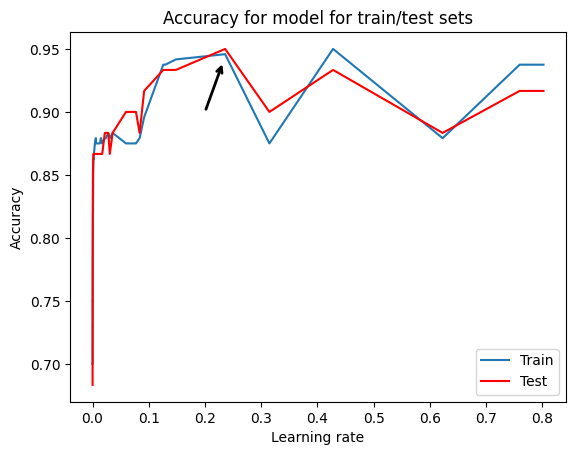

In [6]:
plt.plot(learning_rates, predictions_Train, label = "Train")
plt.plot(learning_rates, predictions_Test, c = 'red', label = "Test")
plt.legend(loc='lower right')
plt.xlabel('Learning rate') # add to x-label to the plot
plt.ylabel('Accuracy') # add y-label to the plot
plt.title('Accuracy for model for train/test sets') # add title to the plot


plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(0.2325, 0.94),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(0.20, 0.9),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2)
             )

In [7]:
# Store best learning rate
learning_rate = learning_rates[np.argmax(predictions_Test)]
# Train network using best learning rate
parameters, cost, learningrate = Network.Fit(X = X_Train, 
                                             Y = Y_Train, 
                                             layers_dims = layers_dims, 
                                             optimizer = "gd",
                                             learning_rate = learning_rate,
                                             print_cost = True)

Cost after epoch 0: 0.687145
Cost after epoch 1000: 0.295834
Cost after epoch 2000: 0.213995
Cost after epoch 3000: 0.136182
Cost after epoch 4000: 0.135974


plotting decision boundary


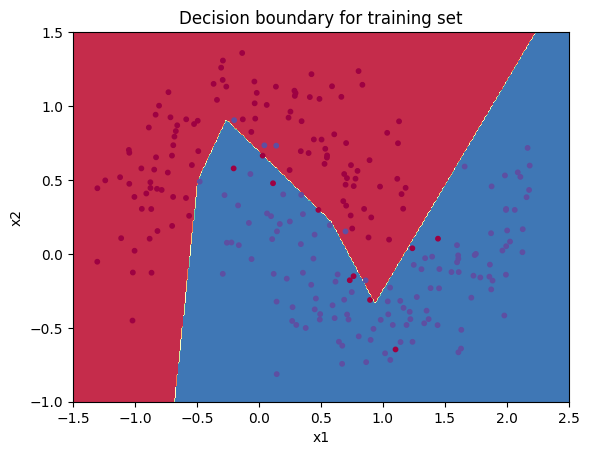

In [8]:
# Plot decision boundary for training set
plt.title("Decision boundary for training set")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: Network.predict(parameters, x.T), X_Train, Y_Train)

plotting decision boundary


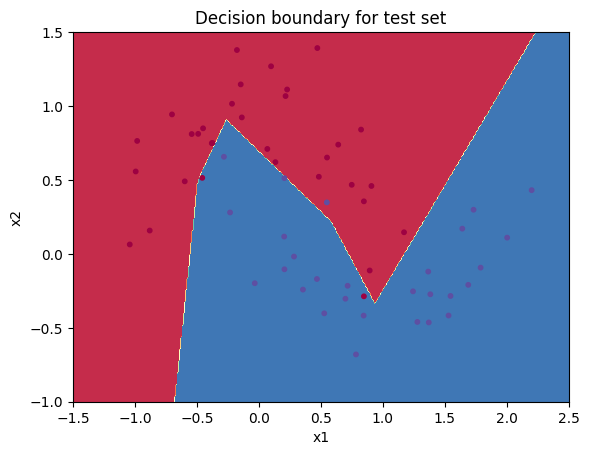

In [9]:
# Plot decision boundary for test set
plt.title("Decision boundary for test set")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: Network.predict(parameters, x.T), X_Test, Y_Test)

<a name='1'></a>
### 3.1 - Hidden units
Another relevant hyperparameter is the number of hidden units (neurons) in each layer. We consider a shallow network architecture as the data is low-dimensional such that deep networks mostl likely would overfit data. 

In [10]:
# Tune hidden units
# Search from n_[1] = 2 to 7
neurons = range(2,7)
predictions_Train = []
predictions_Test = []
i = 1

# Fit network over range of learning rates
for neuron in neurons:
       
    parameters, cost, learningrate = Network.Fit(X = X_Train, 
                                                 Y = Y_Train, 
                                                 layers_dims = [X.shape[0], neuron, 1], 
                                                 optimizer = "gd",
                                                 learning_rate = learning_rate,
                                                 print_cost = False)
    
    predictions_Tr = Network.predict(parameters, X_Train)
    predictions_Te = Network.predict(parameters, X_Test)
    
    predictions_Train.append( float((np.dot(Y_Train, predictions_Tr.T) + np.dot(1 - Y_Train, 1 - predictions_Tr.T)) / float(Y_Train.size)) )
    predictions_Test.append( float((np.dot(Y_Test, predictions_Te.T) + np.dot(1 - Y_Test, 1 - predictions_Te.T)) / float(Y_Test.size)) )
    
    print('iteration ' + str(i))
    i += 1
    

iteration1
iteration2
iteration3
iteration4
iteration5


Text(3.75, 0.931, '')

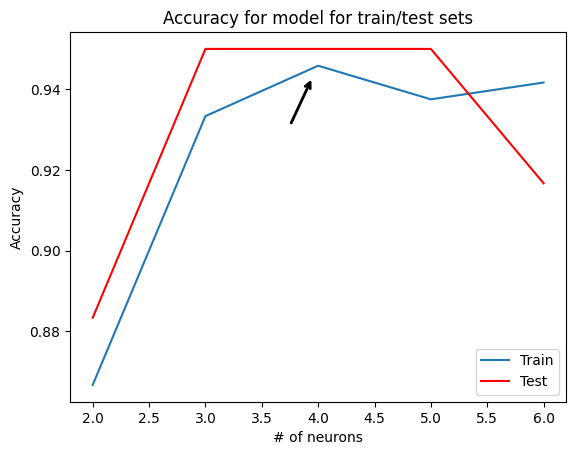

In [11]:
plt.plot(neurons, predictions_Train, label = "Train")
plt.plot(neurons, predictions_Test, c = 'red', label = "Test")
plt.legend(loc='lower right')
plt.xlabel('# of neurons') # add to x-label to the plot
plt.ylabel('Accuracy') # add y-label to the plot
plt.title('Accuracy for model for train/test sets') # add title to the plot

plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(3.95, 0.943),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(3.75, 0.931),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2)
             )

Conveniently, the architecture using 4 units were already the best solution. Finally, we check the accuracy of the final specification.

In [14]:
# Optimal architecture for shallow network
layers_dims = [X_Train.shape[0], 4, 1]

parameters, cost, learningrate = Network.Fit(X = X_Train, 
                                             Y = Y_Train, 
                                             layers_dims = layers_dims, 
                                             optimizer = "gd",
                                             learning_rate = learning_rate,
                                             print_cost = True)
# Predict Y
predictions_Train = Network.predict(parameters, X_Train)
predictions_Test = Network.predict(parameters, X_Test)
# Print accuracy of training and test samples
print ('Train Accuracy: %d' % float((np.dot(Y_Train, predictions_Train.T) + np.dot(1 - Y_Train, 1 - predictions_Train.T)) / float(Y_Train.size) * 100) + '%')
print ('Test Accuracy: %d' % float((np.dot(Y_Test, predictions_Test.T) + np.dot(1 - Y_Test, 1 - predictions_Test.T)) / float(Y_Test.size) * 100) + '%')

Cost after epoch 0: 0.687145
Cost after epoch 1000: 0.295834
Cost after epoch 2000: 0.213995
Cost after epoch 3000: 0.136182
Cost after epoch 4000: 0.135974
Train Accuracy: 94%
Test Accuracy: 95%
